In [1]:
import torch
from torch.autograd import Variable

In [2]:
class MyReLU(torch.autograd.Function):
    """
    Make your own autograd function !    
    """
    @staticmethod
    def forward(ctx, input):
        """
        This forward method returns 'ReLU(input)'.
        ctx : Context Object to save info for backpropagation 
        """
        ctx.save_for_backward(input)
        return input.clamp(min=0)
    
    @staticmethod
    def backward(ctx, grad_output):
        """
        This method returns gradient for your activation function.
        """
        input, = ctx.saved_tensors
        grad_ReLU = grad_output.clone()
        grad_ReLU[input<0] = 0
        return grad_ReLU

In [3]:
dtype = torch.FloatTensor

batch_size, input_size, hidden_size, output_size = 64, 1000, 100, 10

# x = torch.randn(batch_size, input_size).type(dtype)
# y = torch.randn(batch_size, output_size).type(dtype)
x = Variable(torch.randn(batch_size, input_size).type(dtype), requires_grad=False)
y = Variable(torch.randn(batch_size, output_size).type(dtype), requires_grad=False)

# w1 = torch.randn(input_size, hidden_size).type(dtype)
# w2 = torch.randn(hidden_size, output_size).type(dtype)
w1 = Variable(torch.randn(input_size, hidden_size).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(hidden_size, output_size).type(dtype), requires_grad=True)

learning_rate = 1e-6

In [4]:
all_losses = []

for i in range(500):
    relu = MyReLU.apply
    
    # forward
    inh1 = x.mm(w1)
    outh1 = relu(inh1)
    prediction = outh1.mm(w2)
    
    # loss
    loss = (prediction - y).pow(2).sum()
#     print('i = %d, loss = %d' %(i, loss.data))
    all_losses.append(loss)
    
    # backward (WE NEED 'grad_loss_w1', 'grad_loss_w2' for weight update)
    loss.backward()
    
    # weight update
#     w1 -= learning_rate * grad_loss_w1
#     w2 -= learning_rate * grad_loss_w2
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data
    
    # make your gradient 0
    w1.grad.data.zero_()
    w2.grad.data.zero_()

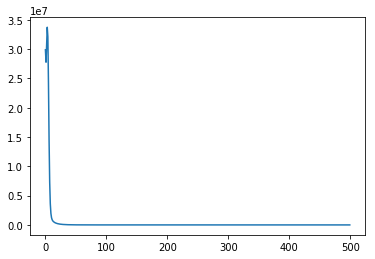

In [5]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure()
plt.plot(all_losses)